Plotting Unfiltered Data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X Sweep Avg Time: 101.45598082315354ms Std Dev: 0.9442814200231605ms
Y Sweep Avg Time: 102.30693363008045ms Std Dev: 1.624457678014084ms
Z Sweep Avg Time: 101.97780529658ms Std Dev: 4.7333988177417545ms
Circle Sweep Avg Time: 101.74739076977684ms Std Dev: 1.1852657435484952ms


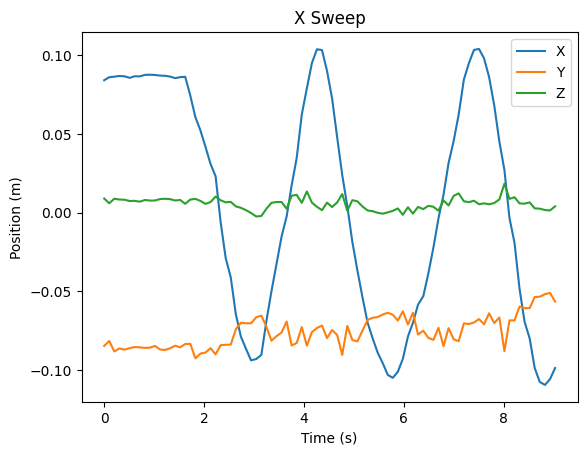

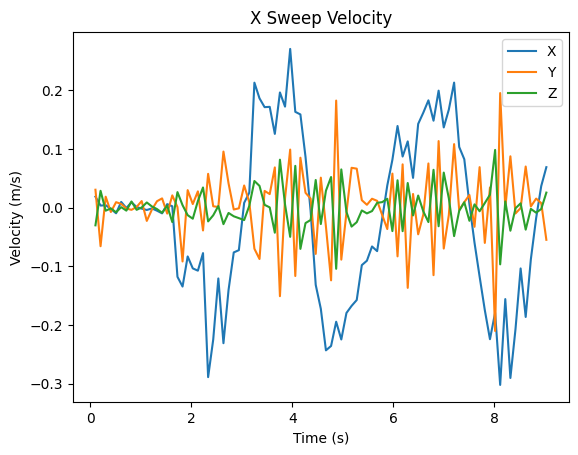

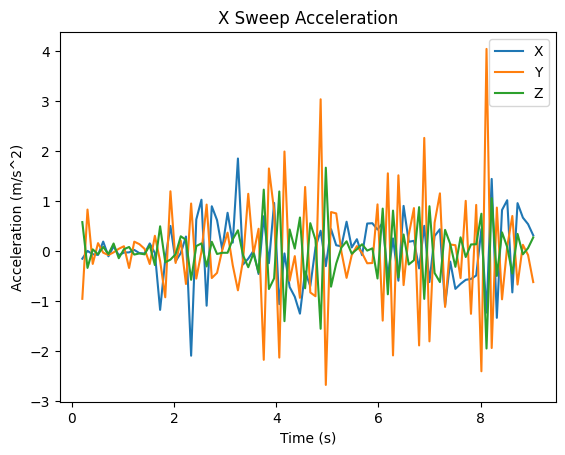

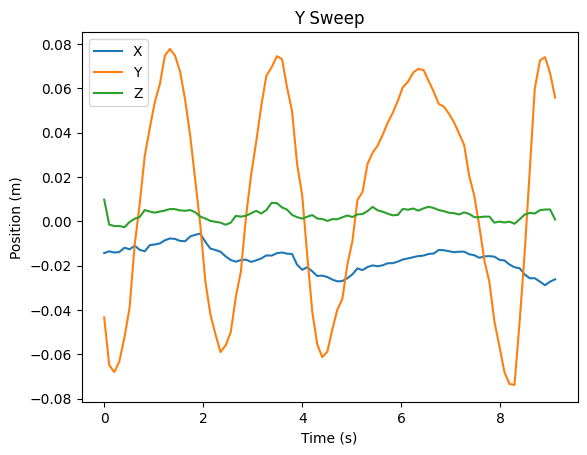

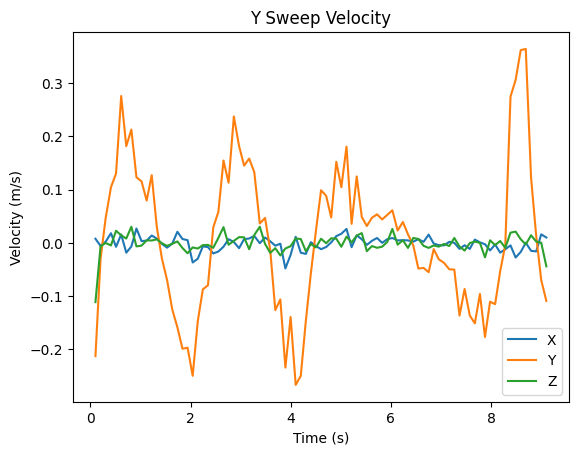

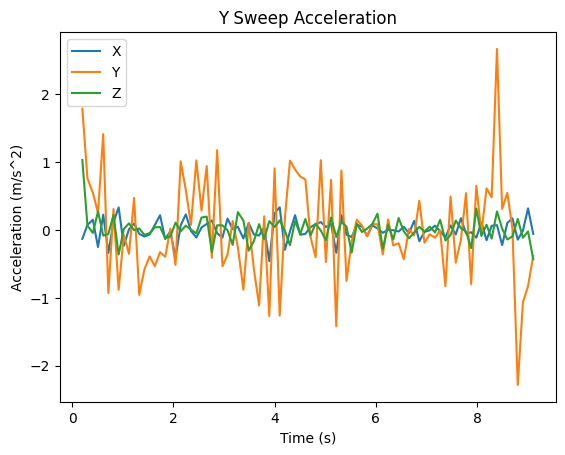

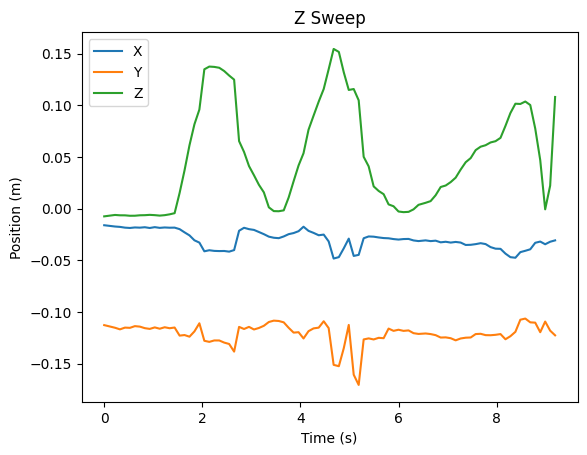

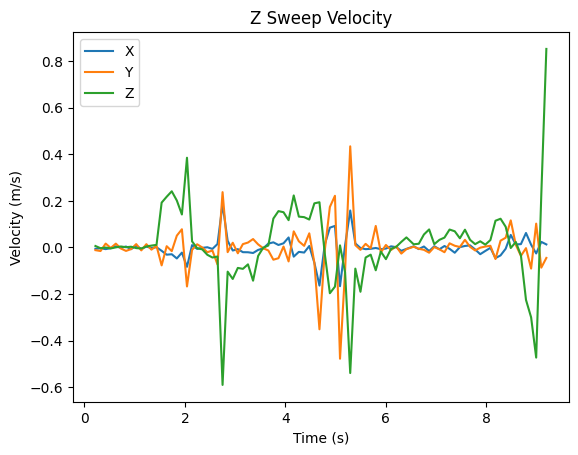

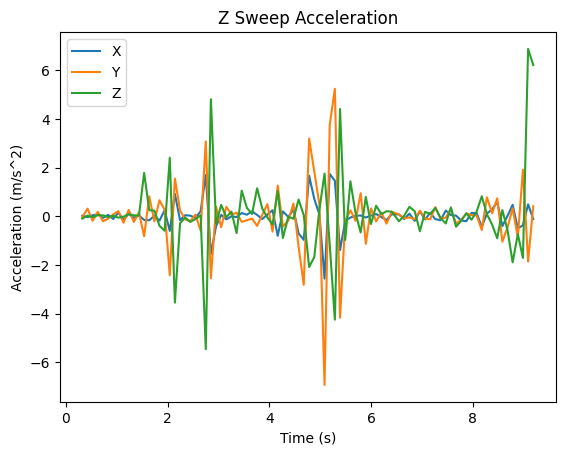

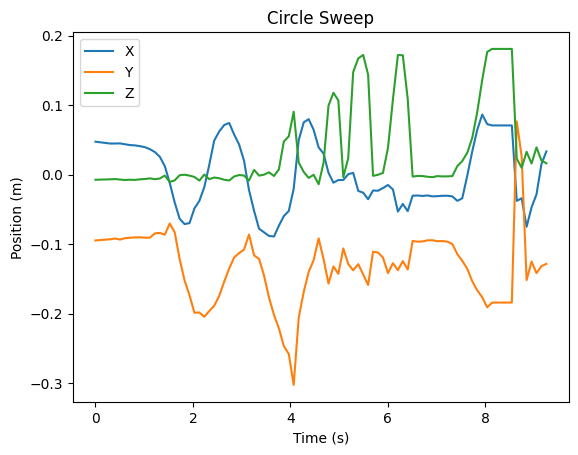

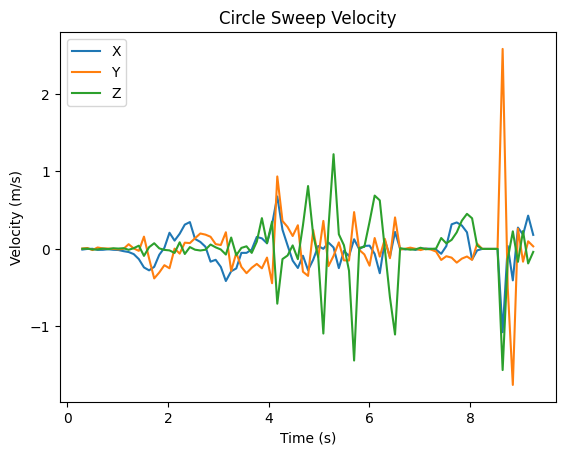

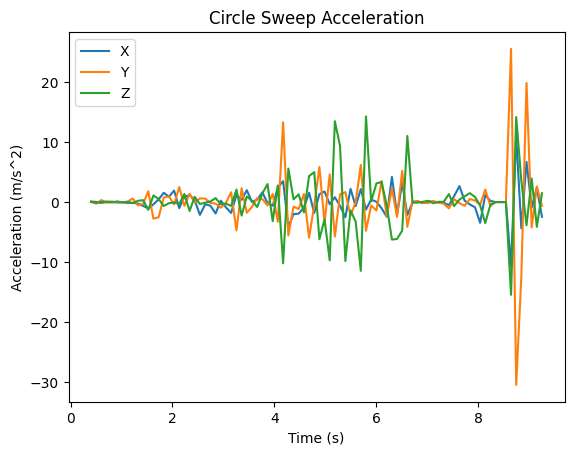

In [50]:
xTestDF = pd.read_csv('xSweep.csv')
yTestDF = pd.read_csv('ySweep.csv')
zTestDF = pd.read_csv('zSweep.csv')
circleTest = pd.read_csv('circle.csv')

def plotData(df, title):
    times = df['Time'] - df['Time'][0]
    x = df['X']
    y = df['Y']
    z = df['Z']
    plt.figure()
    plt.plot(times, x, label='X')
    plt.plot(times, y, label='Y')
    plt.plot(times, z, label='Z')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.legend()
    plt.show()
    dxdt = np.diff(x)/np.diff(times)
    dydt = np.diff(y)/np.diff(times)
    dzdt = np.diff(z)/np.diff(times)
    plt.figure()
    plt.plot(times[1:], dxdt, label='X')
    plt.plot(times[1:], dydt, label='Y')
    plt.plot(times[1:], dzdt, label='Z')
    plt.title(title + ' Velocity')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.legend()
    plt.show()
    d2xdt2 = np.diff(dxdt)/np.diff(times[1:])
    d2ydt2 = np.diff(dydt)/np.diff(times[1:])
    d2zdt2 = np.diff(dzdt)/np.diff(times[1:])
    plt.figure()
    plt.plot(times[2:], d2xdt2, label='X')
    plt.plot(times[2:], d2ydt2, label='Y')
    plt.plot(times[2:], d2zdt2, label='Z')
    plt.title(title + ' Acceleration')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.legend()
    plt.show()

def calcTimes(df, title):
    frameTimes = (np.diff(df["Time"][5:]))*1000
    print(title + " Avg Time: " + str(np.mean(frameTimes)) + "ms" + " Std Dev: " + str(np.std(frameTimes)) + "ms")

calcTimes(xTestDF, 'X Sweep')
calcTimes(yTestDF, 'Y Sweep')
calcTimes(zTestDF, 'Z Sweep')
calcTimes(circleTest, 'Circle Sweep')

plotData(xTestDF, 'X Sweep')
plotData(yTestDF, 'Y Sweep')
plotData(zTestDF, 'Z Sweep')
plotData(circleTest, 'Circle Sweep')



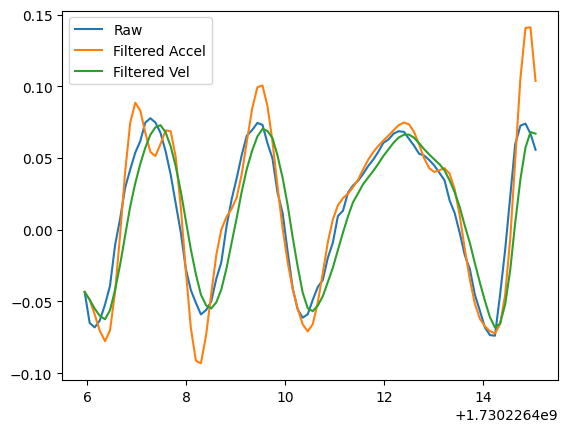

In [59]:
def smoothAccel(x, t, windowSize):
    As = np.zeros(windowSize)
    vprev = 0
    xFiltered = np.zeros(len(x))
    for i in range(len(x)):
        if i < windowSize:
            xFiltered[i] = x[i]
        if i == 0:
            continue
        dt = t[i] - t[i-1]
        v = (x[i] - x[i-1])/dt
        a = (v - vprev)/dt
        As[i%windowSize] = a
        vprev = vprev + np.mean(As)*dt
        xFiltered[i] = xFiltered[i-1] + vprev*dt
        
    return xFiltered

def smoothVelocity(x, t, windowSize):
    vs = np.zeros(windowSize)
    xFiltered = np.zeros(len(x))
    for i in range(len(x)):
        if i < windowSize:
            xFiltered[i] = x[i]
        if i == 0:
            continue
        dt = t[i] - t[i-1]
        v = (x[i] - x[i-1])/dt
        vs[i%windowSize] = v
        xFiltered[i] = xFiltered[i-1] + np.mean(vs)*dt
        
    return xFiltered

filtXsByA = smoothAccel(yTestDF['Y'], yTestDF['Time'], 4)
filtXsByV = smoothVelocity(yTestDF['Y'], yTestDF['Time'], 4)
plt.plot(yTestDF['Time'], yTestDF['Y'], label='Raw')
plt.plot(yTestDF['Time'], filtXsByA, label='Filtered Accel')
plt.plot(yTestDF['Time'], filtXsByV, label='Filtered Vel')
plt.legend()
plt.show()

